# SCSS-Net: Solar Corona Structures Segmentation by Deep Learning


---


#          Part II: Segmentation of Active Regions

---



## Jupyter notebook – Segmentation of Active Regions
In the following, we present the data and Python methods used for analysis described in the article. Here is an overview of the Jupyter notebook:
1. Environment set-up
2. Data preparation
3. Deep learning approach
4. Results of SCSS-net


# 1. Environment set-up

* Import libraries

In [ ]:
import boto3
import zipfile
import glob
from datetime import datetime
from PIL import Image
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import albumentations
from ImageDataAugmentor.image_data_augmentor import *

* Import local utilities

In [ ]:
import sys, os
sys.path.append('../scss-net/src')
from model_scss_net import scss_net
from metrics import dice_np, iou_np, dice, iou
from utils import plot_imgs, plot_metrics

# 2. Data preparation

Solar Dynamic Observatory / Atmospheric Imaging Assembly - SDO / AIA 193 data are used in this work. For more data details refer to [NASA web page](https://sdo.gsfc.nasa.gov). The data were downloaded via [Helioviewer API](https://api.helioviewer.org) for the same date and time as the time stamp of available annotations.  

Annotations used in this notebook are combination of following sources:
* [Custom](https://github.com/space-lab-sk/scss-net/blob/main/src/custom_data_preparation.ipynb) *(this Jupyter notebook also contains steps to preprocess SDO/AIA data and Custom annotations)*
* [SPoCA](https://www.lmsal.com/hek/)

*Spoca AR*: 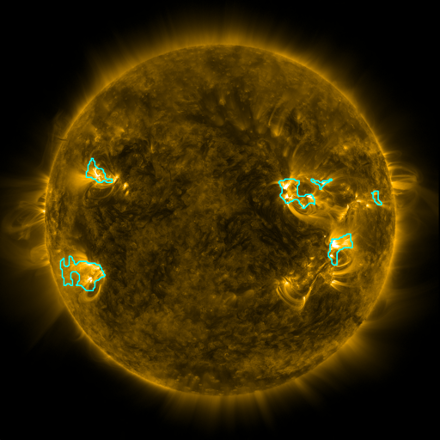                                                         *Custom AR*: 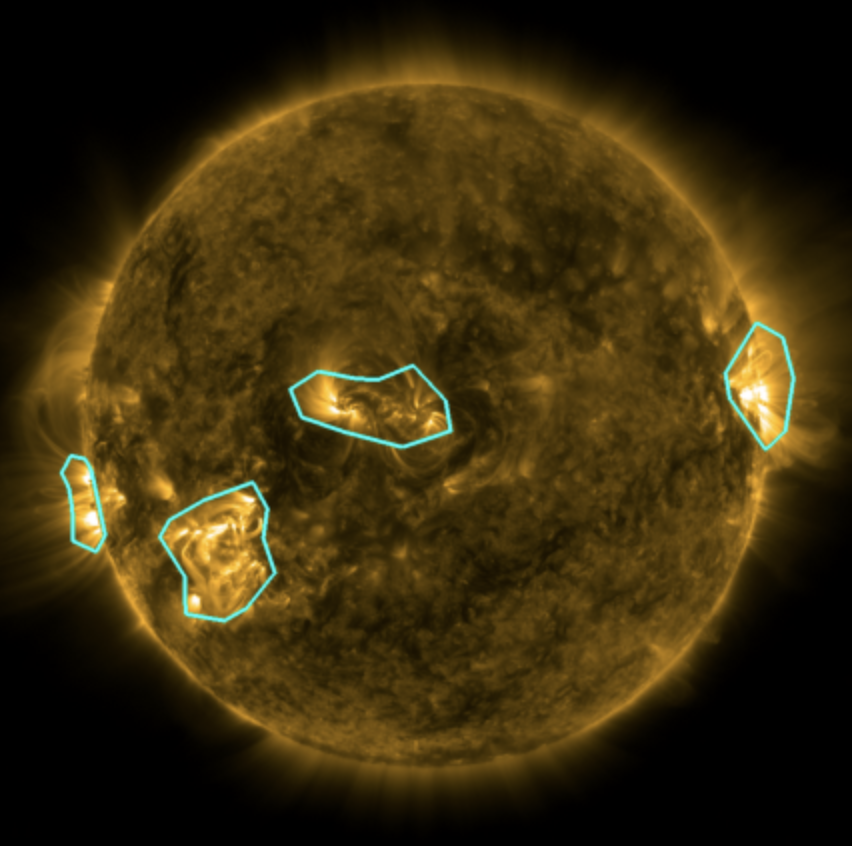
 
 

In [ ]:
# download raw data
s3_client = boto3.client('s3')

bucket = 'summer-school-data-2021'
key = '171.zip'
download_path = f'{os.getcwd()}/{key}'
s3_client.download_file(bucket, key, download_path)

* Unzip


In [ ]:
# TODO

* Create lists with path to each image file (**spoca and zooniverse**) and annotation and **merge both data sources**

In [ ]:
# TODO

* Set global variables

In [ ]:
IMG_SIZE = 256     # resize imgs to 256x256
BATCH_SIZE = 20    # Set batch size
SEED = 42          # set seed for reproducibility
EPOCHS = 100       # Set number of epochs
NB_IMGS = 500      # Number of images to consider (because of memory issues)

MODEL_NAME = "model_ar_spoca"                   # Specify model name
model_filename = f"./{MODEL_NAME}.h5"           # Specify path where to save model

* Load, Resize, and Convert data to list of np arrays 
    - **you need list of input images and list of annotations**

In [ ]:
# TODO

* Normalize to 0-1 and chcek shape

In [ ]:
# TODO

* Reshape to (n_imgs, height, width, channels)

In [ ]:
# TODO

* Split data to Train set (80%) and Validation set (20%)

In [ ]:
# TODO

* Add augumentations to train set

In [ ]:
# TODO

* Plot samples of augmented imgs

In [ ]:
# TODO

* Chcek if shapes of input is suitable for model training (**input shape should be (256, 256, 1)**)

In [ ]:
# TODO

# 3. Deep learning approach

* The SCSS-net model architecture is defined in **../src/model_scss_net.py**. Load the model with the parameters that were found to be optimal for Coronal Holes. This is transfer learning (develop model approach).

In [ ]:
# TODO

# Create model with specific parameteres

# Compile model


In [ ]:
# download already trained model (~100 MB)
bucket = 'summer-school-data-2021'
key = 'model_ar_spoca.h5'
download_path = f'{os.getcwd()}/{key}'
s3_client.download_file(bucket, key, download_path)

* Load the trained model

In [ ]:
# TODO

# 4. Results od SCSS-net

## 4.1 Results on validation set

* Predict new masks for validation set

In [ ]:
# TODO

* Plot Image sequence: 
 - input image for SCSS-Net 
 - ground truth (i.e. annotation mask)
 - output of SCSS-Net (i.e. predicted segmentation mask)
 - predicted segmentation mask as an overlay on the input image

In [ ]:
# TODO

* Calculate averaged metrics (Dice and IoU) over the validation set without and with applied threshold (change the threshold and check the change in metrics)

In [ ]:
# TODO

## 4.2 Results on test set

* Prepare test set


In [ ]:
imgs_test = glob.glob("./data/171_test/imgs/*.png")
masks_test = glob.glob("./data/171_test/masks(spoca)/*.png")

print(f"Imgs number = {len(imgs_test)}\nMasks number = {len(masks_test)}")

*  Load data and convert imgs to np.array

In [ ]:
# TODO

* Normalization 0-1

In [ ]:
# TODO

* Reshape to (n_imgs, height, width, channels)

In [ ]:
# TODO

* Predict new masks for test set and plot image sequence:

In [ ]:
# TODO

* Calculate averaged metrics over the test set without and with applied threshold

In [ ]:
# TODO